<a href="https://colab.research.google.com/github/ChetanJadhav2341/Health-Insurance-Cross-Sell-Prediction-Classification-Project/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [1]:
# Add Basic librory

import pandas as pd
import numpy as np

# **Importing Librory**

In [2]:
# import basic librory
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# used in data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#used to split dataset

from sklearn.model_selection import train_test_split

# used to resampling(when our dependentvariable is imbalance)

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# ML Algoritham

from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


# used in fiture selection

from sklearn.ensemble import ExtraTreesClassifier


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

sns.set_theme(style="darkgrid")



In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Project-Classification/Health Insurance Cross Sell Prediction/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df.sample(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
60235,60236,Female,25,1,7.0,0,< 1 Year,Yes,30571.0,152.0,104,0
138941,138942,Male,39,1,28.0,0,1-2 Year,Yes,31277.0,124.0,97,0
332129,332130,Male,52,1,28.0,0,1-2 Year,Yes,40013.0,124.0,44,0
152970,152971,Male,28,1,8.0,0,1-2 Year,Yes,38545.0,156.0,49,1
136586,136587,Female,27,1,46.0,1,< 1 Year,No,31799.0,152.0,148,0
117579,117580,Male,23,1,6.0,1,< 1 Year,No,25278.0,152.0,279,0
110844,110845,Male,53,1,28.0,0,1-2 Year,Yes,38913.0,26.0,298,0
292451,292452,Male,22,1,8.0,1,< 1 Year,No,40846.0,160.0,111,0
33995,33996,Male,23,1,33.0,1,< 1 Year,No,31497.0,152.0,40,0
176295,176296,Male,25,1,29.0,0,< 1 Year,No,33326.0,152.0,98,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
df.shape

(381109, 12)

In [10]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

# **Dataset Detail**



*   A new data frame where we have columns name of this df along with 
datatypes, missing value no , unique value no , first value , second value.



In [11]:
def DataInfoAll(df):
  print(f"Dataset Shape :  {df.shape}")
  print("-"*75)
  summary=pd.DataFrame(df.dtypes, columns=['dtypes'])
  summary=summary.reset_index()
  summary['Name']=summary['index']
  summary=summary[['Name', 'dtypes']]
  summary['Missing']=df.isnull().sum().values
  summary['Uniques']=df.nunique().values
  summary['First Value']=df.iloc[0].values
  summary['Second Value']=df.iloc[1].values
  return summary

In [12]:
DataInfoAll(df)

Dataset Shape :  (381109, 12)
---------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,id,int64,0,381109,1,2
1,Gender,object,0,2,Male,Male
2,Age,int64,0,66,44,76
3,Driving_License,int64,0,2,1,1
4,Region_Code,float64,0,53,28.0,3.0
5,Previously_Insured,int64,0,2,0,0
6,Vehicle_Age,object,0,3,> 2 Years,1-2 Year
7,Vehicle_Damage,object,0,2,Yes,No
8,Annual_Premium,float64,0,48838,40454.0,33536.0
9,Policy_Sales_Channel,float64,0,155,26.0,26.0


There is not null value present in the dataset

All the numerical values are present in integer or float daatatype,


## **Checking Outlier**

In [13]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


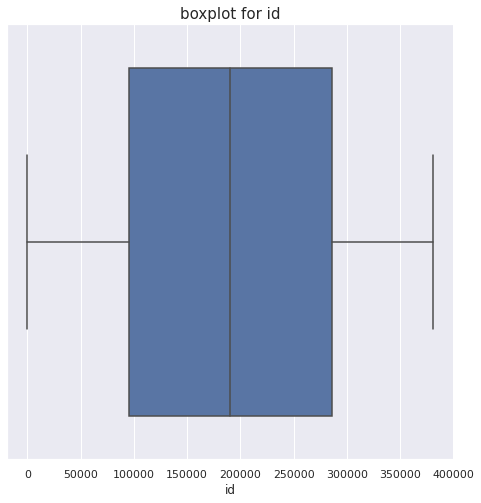

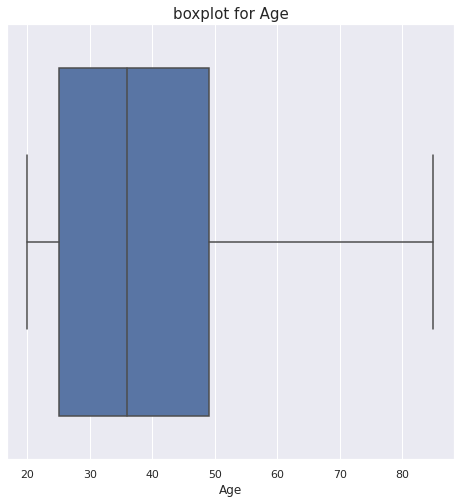

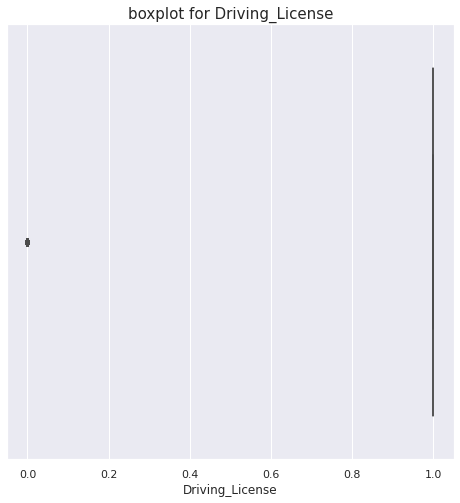

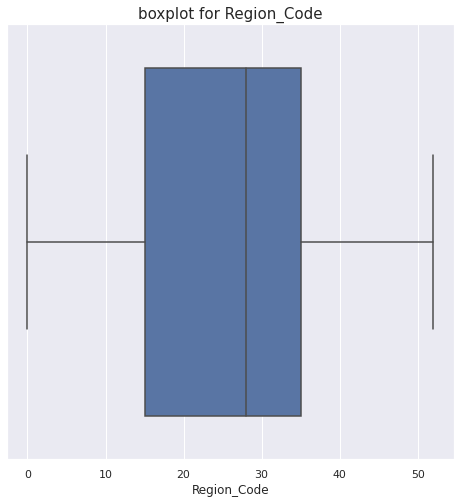

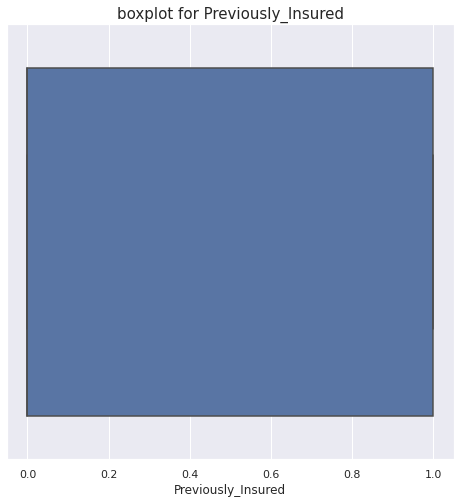

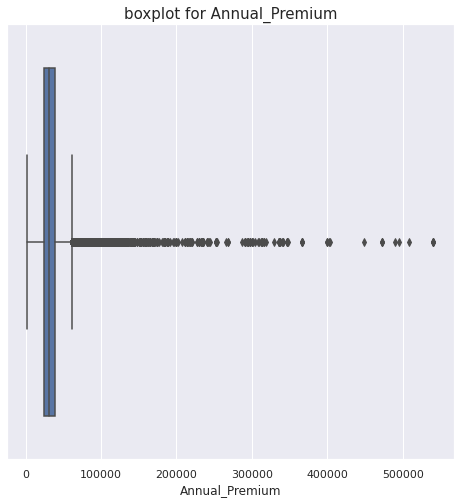

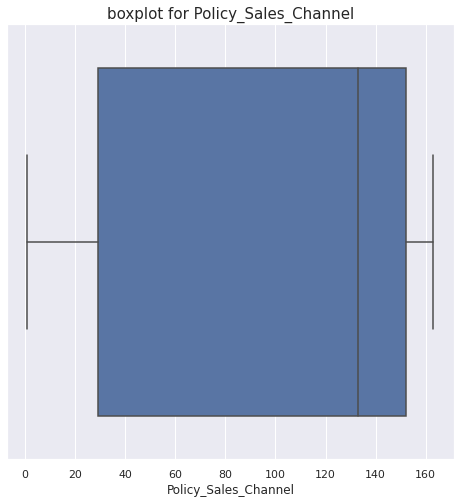

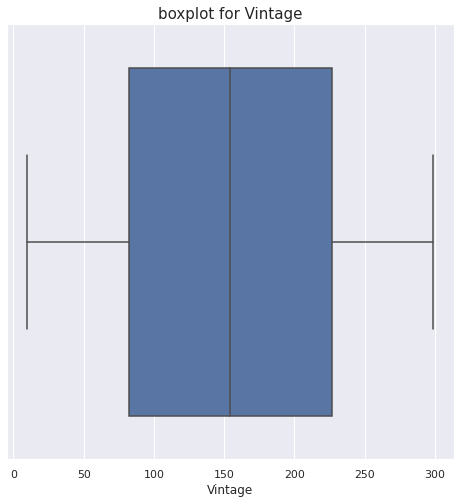

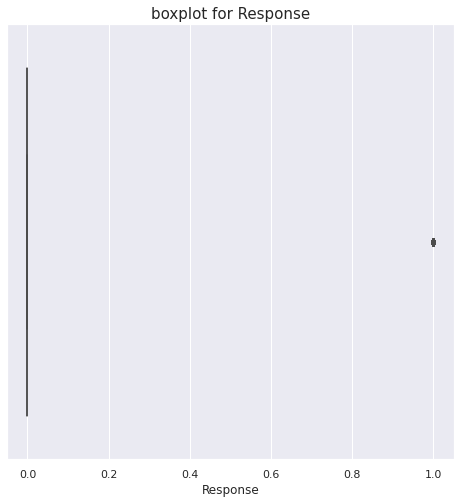

In [14]:
df1 = df[list(df.describe())]

for columns in df1:
  plt.figure(figsize=(8,8))
  plt.title(f'boxplot for {columns}', fontsize=15)
  sns.boxplot(data=df1, x=columns)

**Checking Duplicates value**

In [15]:
df.duplicated().sum()

0

There are 0 duplicated row present in the dataset

**Checking NaN values**

In [16]:
df.isna().sum().to_frame().T

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,0,0,0,0,0,0,0,0,0,0


# **Data Visualization**

Target Variable

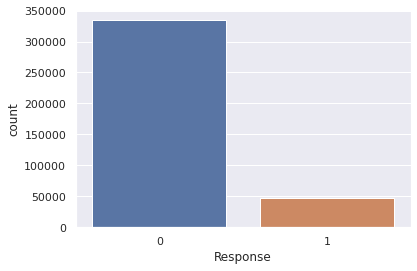

In [17]:
sns.set_theme(style='darkgrid')
sns.countplot(df['Response'], data=df)

**The Data is Highly imbalanced.**

As you can see in above graph, there are very few intrested customers whose start less than 50000 and those above 300000 are not intrested 

Let's check Outlier present in All Numerical columns

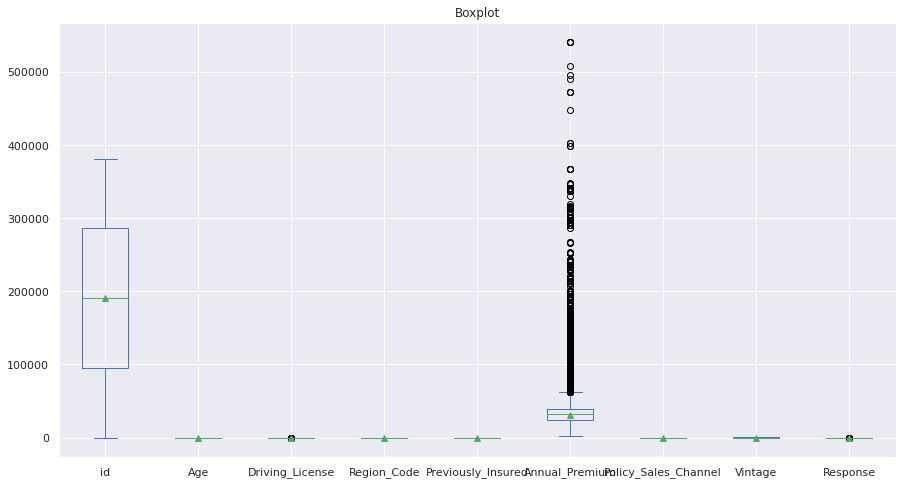

In [23]:
plt.rcParams['figure.figsize']=(15,8)

ax=df[list(df.describe())].plot(kind='box', title='Boxplot', showmeans=True)

plt.show()